In [1]:
# Read weather information frmo csv file for years 1997 to 2015 on a daily basis
weather = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/weather_madrid_LEMD_1997_2015.csv")
weather.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)

In [2]:
# check number of records
weather.count()

Out[ 2 ]: 6812

In [3]:
weather.take(3)

Out[ 3 ]: 
[Row(CET=datetime.datetime(1997, 1, 1, 0, 0), Max TemperatureC=7, Mean TemperatureC=4, Min TemperatureC=2, Dew PointC=5, MeanDew PointC=3, Min DewpointC=2, Max Humidity=100, Mean Humidity=95, Min Humidity=76, Max Sea Level PressurehPa=1010, Mean Sea Level PressurehPa=1008, Min Sea Level PressurehPa=1004, Max VisibilityKm=10, Mean VisibilityKm=9, Min VisibilitykM=4, Max Wind SpeedKm/h=13, Mean Wind SpeedKm/h=6, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=6, Events=None, WindDirDegrees=229),
 Row(CET=datetime.datetime(1997, 1, 2, 0, 0), Max TemperatureC=7, Mean TemperatureC=3, Min TemperatureC=0, Dew PointC=6, MeanDew PointC=3, Min DewpointC=0, Max Humidity=100, Mean Humidity=92, Min Humidity=71, Max Sea Level PressurehPa=1007, Mean Sea Level PressurehPa=1003, Min Sea Level PressurehPa=997, Max VisibilityKm=10, Mean VisibilityKm=9, Min VisibilitykM=4, Max Wind SpeedKm/h=26, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=47, Precipitationmm=0.0, CloudCover=5, Events='Rain', WindDirDegrees=143),
 Row(CET=datetime.datetime(1997, 1, 3, 0, 0), Max TemperatureC=5, Mean TemperatureC=3, Min TemperatureC=2, Dew PointC=5, MeanDew PointC=1, Min DewpointC=-1, Max Humidity=100, Mean Humidity=85, Min Humidity=70, Max Sea Level PressurehPa=1005, Mean Sea Level PressurehPa=999, Min Sea Level PressurehPa=996, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=7, Max Wind SpeedKm/h=27, Mean Wind SpeedKm/h=19, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=6, Events='Rain-Snow', WindDirDegrees=256)]

In [4]:
weather.registerTempTable("weatherT")
res1 = sqlContext.sql("SELECT CET, `Max TemperatureC`, `Min TemperatureC`, `Mean TemperatureC` FROM weatherT")
res1.show()

+-------------------+----------------+----------------+-----------------+
 CET|Max TemperatureC|Min TemperatureC|Mean TemperatureC|
+-------------------+----------------+----------------+-----------------+
1997-01-01 00:00:00| 7| 2| 4|
1997-01-02 00:00:00| 7| 0| 3|
1997-01-03 00:00:00| 5| 2| 3|
1997-01-04 00:00:00| 7| -1| 3|
1997-01-05 00:00:00| 2| -1| 0|
1997-01-06 00:00:00| 7| 1| 3|
1997-01-07 00:00:00| 2| -2| 0|
1997-01-08 00:00:00| 8| 1| 4|
1997-01-09 00:00:00| 12| 8| 10|
1997-01-10 00:00:00| 13| 3| 8|
1997-01-11 00:00:00| 16| 5| 10|
1997-01-12 00:00:00| 17| 3| 10|
1997-01-13 00:00:00| 15| 4| 9|
1997-01-14 00:00:00| 11| 0| 6|
1997-01-15 00:00:00| 11| 5| 8|
1997-01-16 00:00:00| 12| 6| 9|
1997-01-17 00:00:00| 13| 5| 9|
1997-01-18 00:00:00| 6| 2| 3|
1997-01-19 00:00:00| 9| 6| 7|
1997-01-20 00:00:00| 9| 5| 7|
+-------------------+----------------+----------------+-----------------+
only showing top 20 rows

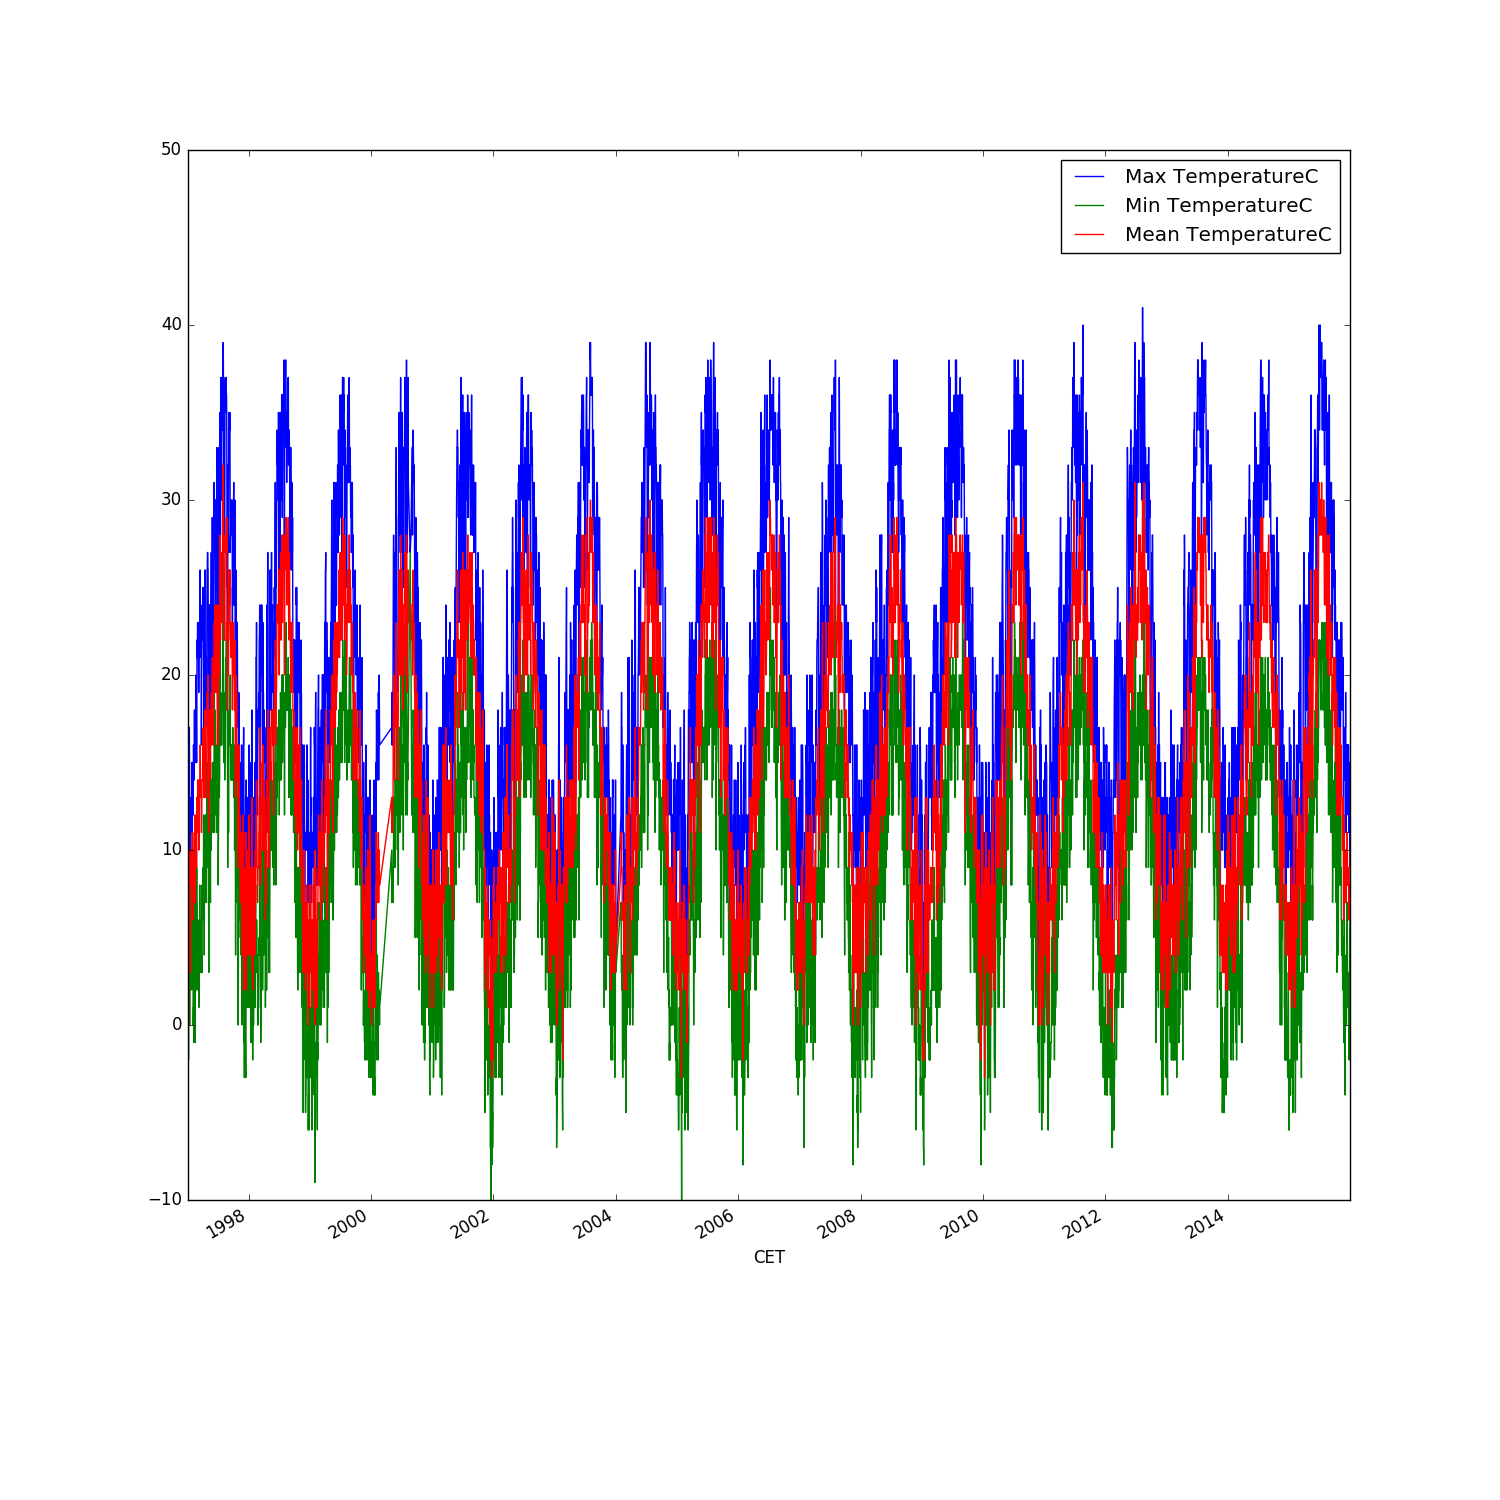

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
ax = plt.gca()
pdDF = res1.toPandas()
pdDF.plot(x='CET', y='Max TemperatureC', ax=ax)
pdDF.plot(x='CET', y='Min TemperatureC', ax=ax)
pdDF.plot(x='CET', y='Mean TemperatureC', ax=ax)
display()

In [6]:
res2 = sqlContext.sql("SELECT CET, ` Max VisibilityKm`, ` Mean VisibilityKm`, ` Min VisibilitykM` FROM weatherT")
res2.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)

In [7]:
res2.show()

+-------------------+-----------------+------------------+-----------------+
 CET| Max VisibilityKm| Mean VisibilityKm| Min VisibilitykM|
+-------------------+-----------------+------------------+-----------------+
1997-01-01 00:00:00| 10| 9| 4|
1997-01-02 00:00:00| 10| 9| 4|
1997-01-03 00:00:00| 10| 10| 7|
1997-01-04 00:00:00| 10| 10| 10|
1997-01-05 00:00:00| 10| 5| 1|
1997-01-06 00:00:00| 10| 10| 10|
1997-01-07 00:00:00| 10| 7| 0|
1997-01-08 00:00:00| 10| 8| 4|
1997-01-09 00:00:00| 10| 10| 10|
1997-01-10 00:00:00| 10| 10| 10|
1997-01-11 00:00:00| 10| 6| 0|
1997-01-12 00:00:00| 10| 10| 10|
1997-01-13 00:00:00| 10| 9| 3|
1997-01-14 00:00:00| 10| 9| 1|
1997-01-15 00:00:00| 10| 10| 8|
1997-01-16 00:00:00| 10| 10| 10|
1997-01-17 00:00:00| 10| 10| 7|
1997-01-18 00:00:00| 10| 7| 3|
1997-01-19 00:00:00| 10| 6| 2|
1997-01-20 00:00:00| 10| 8| 3|
+-------------------+-----------------+------------------+-----------------+
only showing top 20 rows

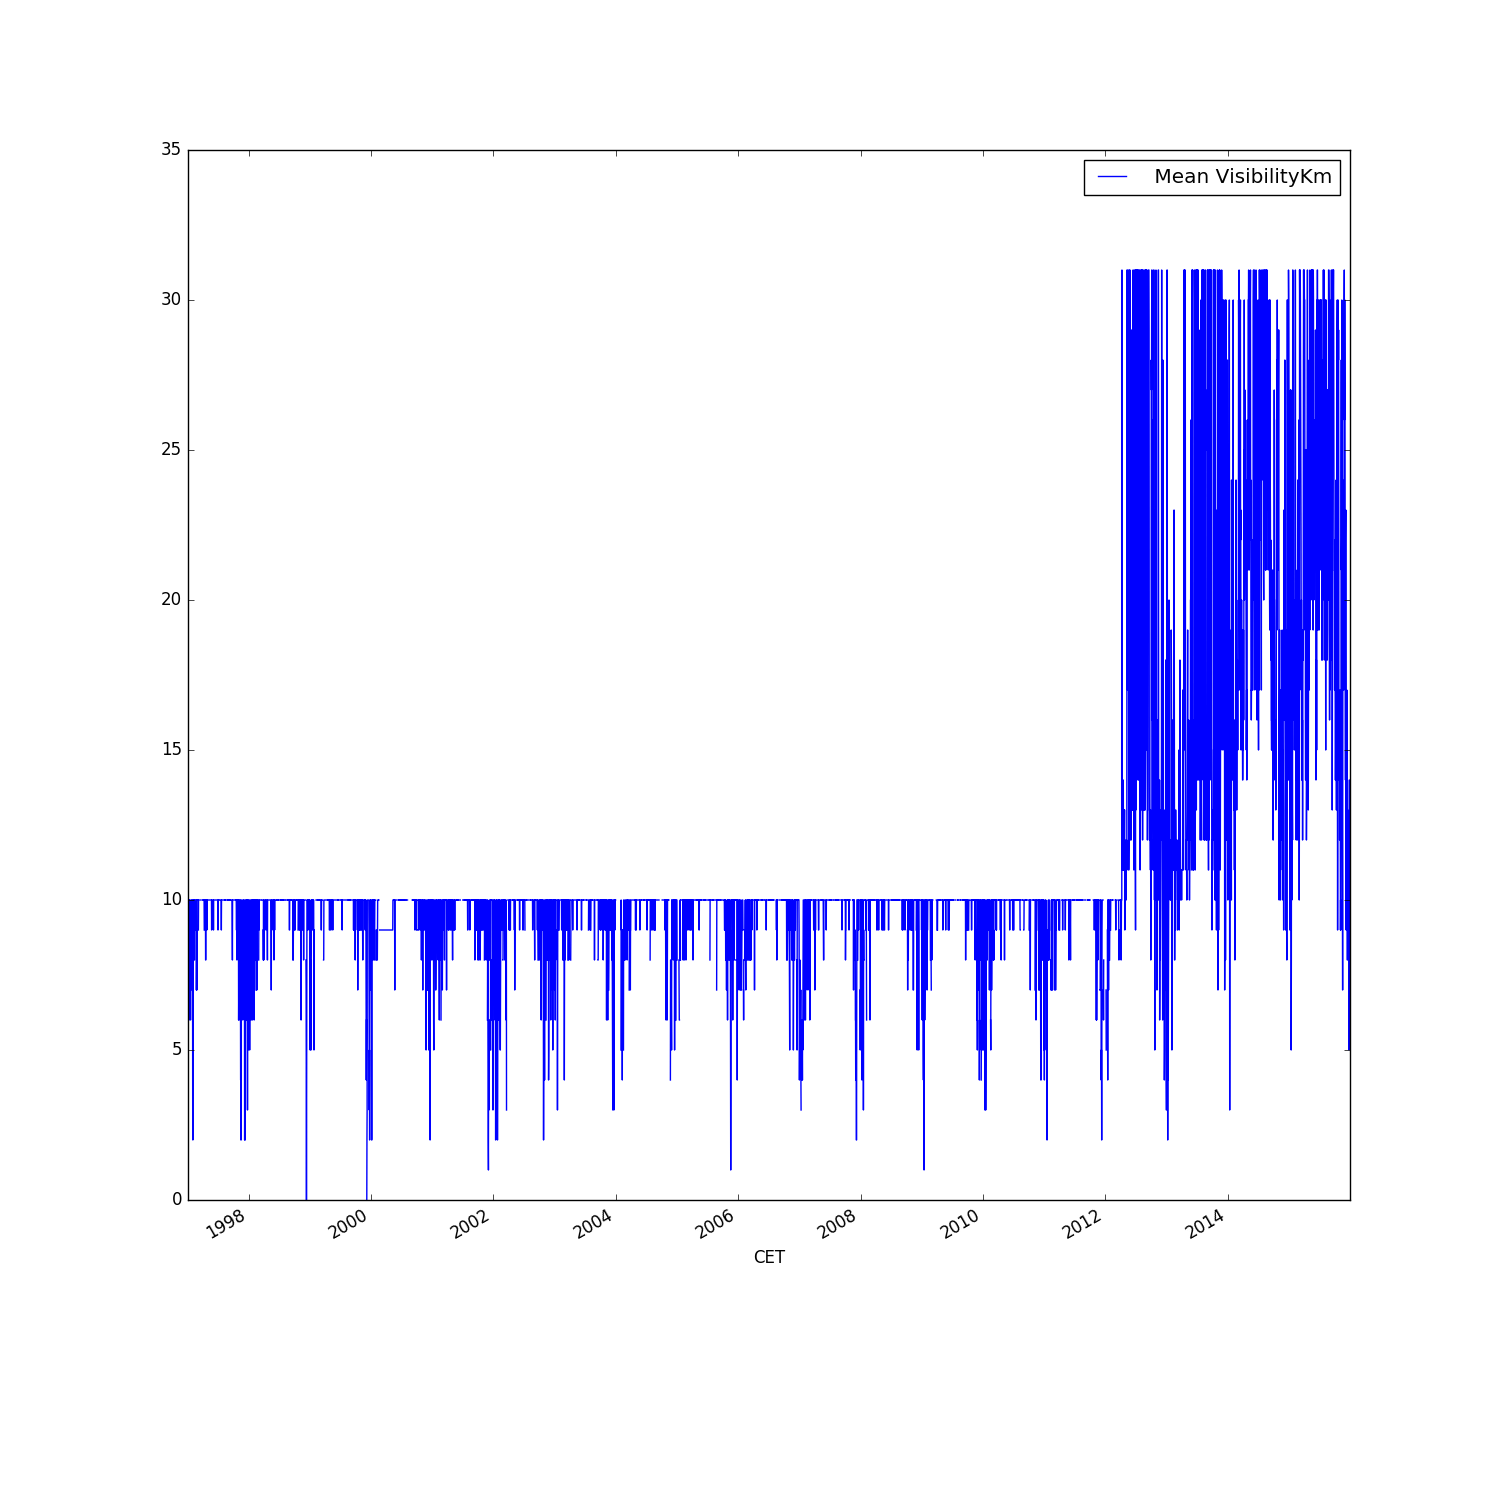

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
ax = plt.gca()
pdDF = res2.toPandas()
#pdDF.plot(x='CET', y=' Max VisibilityKm', ax=ax)
#pdDF.plot(x='CET', y=' Min VisibilitykM', ax=ax)
pdDF.plot(x='CET', y=' Mean VisibilityKm', ax=ax)
display()

In [9]:
# read stations where air pollution is measured from CSV file
stations = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/stations.csv")
stations.printSchema()

root
-- id: integer (nullable = true)
-- name: string (nullable = true)
-- address: string (nullable = true)
-- lon: double (nullable = true)
-- lat: double (nullable = true)
-- elevation: integer (nullable = true)

In [10]:
stations.count()

Out[ 7 ]: 24

In [11]:
stations.registerTempTable("stationsT")
res1 = sqlContext.sql("SELECT name, elevation FROM stationsT")
res1.show()

+--------------------+---------+
 name|elevation|
+--------------------+---------+
 Pza. de España| 635|
 Escuelas Aguirre| 670|
 Avda. Ramón y Cajal| 708|
 Arturo Soria| 693|
 Villaverde| 604|
 Farolillo| 630|
 Casa de Campo| 642|
 Barajas Pueblo| 621|
 Pza. del Carmen| 659|
 Moratalaz| 685|
 Cuatro Caminos| 698|
 Barrio del Pilar| 674|
 Vallecas| 677|
 Mendez Alvaro| 599|
 Castellana| 676|
 Parque del Retiro| 662|
 Plaza Castilla| 728|
Ensanche de Vallecas| 627|
 Urb. Embajada| 618|
Pza. Fernández La...| 604|
+--------------------+---------+
only showing top 20 rows

In [12]:
# read single air pollution files for years 2001 to 2018
air_2001 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2001.csv")
air_2002 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2002.csv")
air_2003 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2003.csv")
air_2004 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2004.csv")
air_2005 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2005.csv")
air_2006 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2006.csv")
air_2007 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2007.csv")
air_2008 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2008.csv")
air_2009 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2009.csv")
air_2010 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2010.csv")
air_2011 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2011.csv")
air_2012 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2012.csv")
air_2013 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2013.csv")
air_2014 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2014.csv")
air_2015 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2015.csv")
air_2016 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2016.csv")
air_2017 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2017.csv")
air_2018 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2018.csv")


In [13]:
# print schema for 2001. Results from command above already show that files have different number of fields
air_2001.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [14]:
air_2001.registerTempTable("air_2001T")

In [15]:
res2001 = sqlContext.sql("SELECT date, CO, NO_2, station FROM air_2001T")
res2001.show()

+-------------------+-------------------+------------------+--------+
 date| CO| NO_2| station|
+-------------------+-------------------+------------------+--------+
2001-08-01 01:00:00| 0.3700000047683716|58.400001525878906|28079001|
2001-08-01 01:00:00| 0.3400000035762787| 56.25|28079035|
2001-08-01 01:00:00| 0.2800000011920929| 50.65999984741211|28079003|
2001-08-01 01:00:00| 0.4699999988079071| 69.79000091552734|28079004|
2001-08-01 01:00:00|0.38999998569488525|22.829999923706055|28079039|
2001-08-01 01:00:00| 0.6299999952316284| 66.26000213623047|28079006|
2001-08-01 01:00:00| 0.2800000011920929| 35.79999923706055|28079007|
2001-08-01 01:00:00| 0.6700000166893005| 74.83000183105469|28079009|
2001-08-01 01:00:00| 0.4099999964237213|33.209999084472656|28079038|
2001-08-01 01:00:00|0.17000000178813934| 24.1299991607666|28079011|
2001-08-01 01:00:00| 0.3799999952316284|40.900001525878906|28079012|
2001-08-01 01:00:00|0.17000000178813934| 30.6299991607666|28079040|
2001-08-01 01:00:00|0.18000000715255737|30.920000076293945|28079014|
2001-08-01 01:00:00|0.23999999463558197|33.869998931884766|28079015|
2001-08-01 01:00:00| 0.25|13.970000267028809|28079016|
2001-08-01 01:00:00|0.17000000178813934|28.979999542236328|28079018|
2001-08-01 01:00:00|0.25999999046325684| 44.77000045776367|28079019|
2001-08-01 01:00:00|0.28999999165534973| 34.06999969482422|28079036|
2001-08-01 01:00:00|0.33000001311302185|43.209999084472656|28079021|
2001-08-01 01:00:00| 0.8100000023841858| 53.47999954223633|28079022|
+-------------------+-------------------+------------------+--------+
only showing top 20 rows

In [16]:
res2001.count()

Out[ 67 ]: 217872

In [17]:
res2001S007 = sqlContext.sql("SELECT date, CO, NO_2, station FROM air_2001T WHERE station=28079007")
pdDF = res2001S007.toPandas()

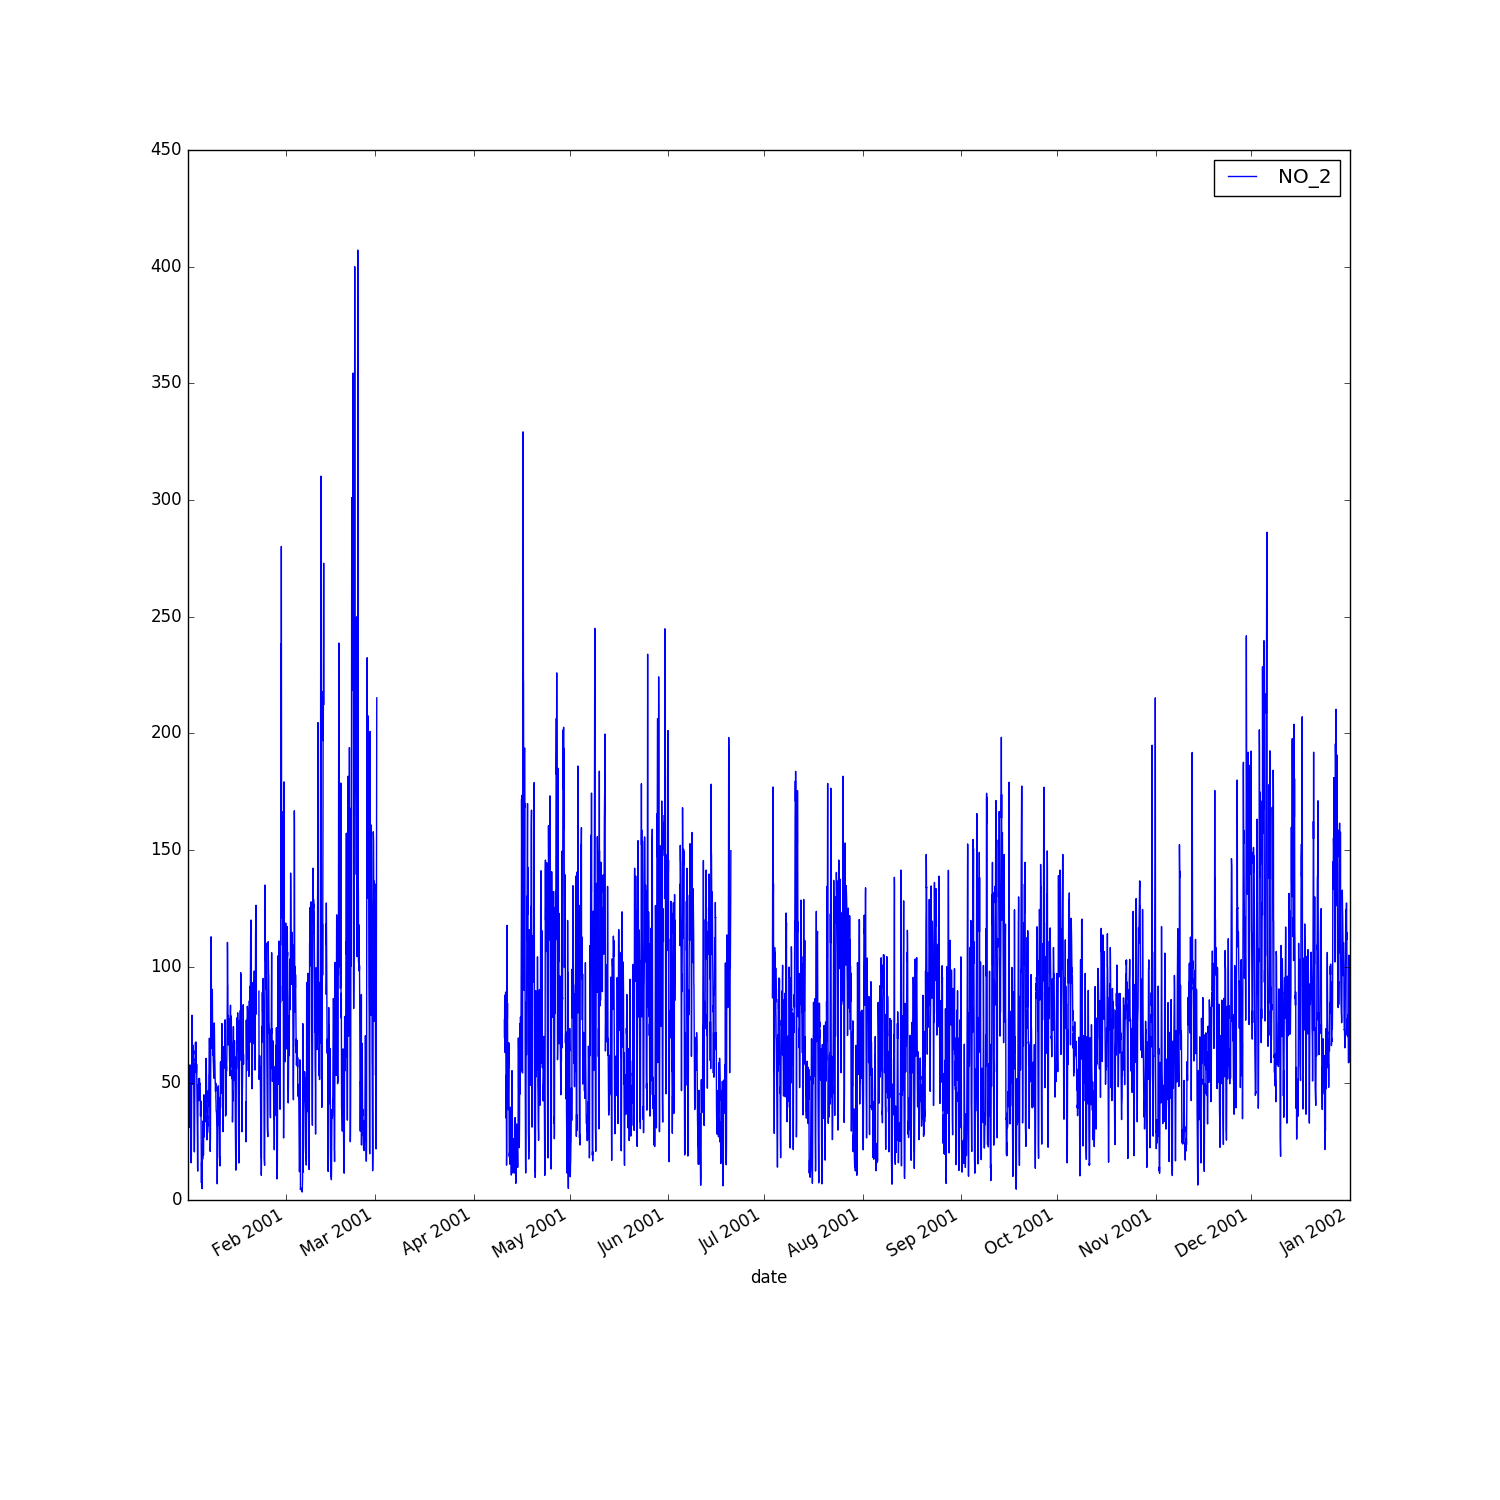

In [18]:
plt.clf()
ax = plt.gca()
#pdDF.plot(x='date', y='CO', ax=ax)
pdDF.plot(x='date', y='NO_2', ax=ax)
display()

In [19]:
# combine dataframes with common schema
air_df1 = air_2001.unionByName(air_2002).unionByName(air_2003)
air_df2 = air_2004.unionByName(air_2005).unionByName(air_2006).unionByName(air_2007).unionByName(air_2008).unionByName(air_2009).unionByName(air_2010)
air_df3 = air_2011.unionByName(air_2012).unionByName(air_2013).unionByName(air_2014).unionByName(air_2015).unionByName(air_2016)
air_df4 = air_2017.unionByName(air_2018)
air_df1.printSchema()
air_df2.printSchema()
air_df3.printSchema()
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CH4: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [20]:
# identify common attributes for all four combined dataframes
common_columns = list(set(air_df1.columns).intersection(air_df2.columns).intersection(air_df3.columns).intersection(air_df4.columns))
print(common_columns)

['CO', 'NMHC', 'PM10', 'TOL', 'EBE', 'SO_2', 'station', 'O_3', 'date', 'BEN', 'NO_2', 'TCH']

In [21]:
# reduce each of the four dataframes to the common attributes
for column in list(set(air_df1.columns) - set(common_columns)):
  air_df1 = air_df1.drop(column)
air_df1.printSchema()
for column in list(set(air_df2.columns) - set(common_columns)):
  air_df2 = air_df2.drop(column)
air_df2.printSchema()
for column in list(set(air_df3.columns) - set(common_columns)):
  air_df3 = air_df3.drop(column)
air_df3.printSchema()
for column in list(set(air_df4.columns) - set(common_columns)):
  air_df4 = air_df4.drop(column)
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [22]:
# now combine to one dataframe 
air_df = air_df1.unionByName(air_df2).unionByName(air_df3).unionByName(air_df4)
air_df.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [23]:
# check number of records in combined dataframe for air pollution
air_df.count()

Out[ 15 ]: 3808224

In [24]:
# helper method to allow normalization of dates by "deleting" hours and minutes, i.e. reducing to day information
import datetime
from pyspark import sql

def replace_date (zeile):
  datum = zeile["date"]
  z = zeile.asDict()
  z['date'] = datum.replace(hour=0, minute=0)
  return sql.types.Row(**z)
  
  
#test_row = sql.Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001)
#print(test_row)
#print(replace_date(test_row))

In [25]:
airRDD = air_df.rdd
airRDD.take(3)

Out[ 17 ]: 
[Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, station=28079035),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, station=28079003)]

In [26]:
# normalize all timestamps to day only, i.e. overwrite hour and minute by 0
airRDD_new = airRDD.map(lambda x: replace_date(x))
airRDD_new.take(3)

Out[ 18 ]: 
[Row(BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079001),
 Row(BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079035),
 Row(BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079003)]

In [27]:
# convert back to dataframe
air_df_new = spark.createDataFrame(airRDD_new)
air_df_new.createOrReplaceTempView("airRDD_new")
air_df_new.count()

Out[ 19 ]: 3808224

In [28]:
air_df_new.registerTempTable("airT")

res1 = sqlContext.sql("SELECT count(*) FROM airT")
res1.show()

+--------+
count(1)|
+--------+
 3808224|
+--------+

In [29]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018.csv", True)
air_df_new.write.csv("/FileStore/tables/Madrid/madrid_2001-2018.csv", sep=",",header = 'true')

In [30]:
%fs ls /FileStore/tables/Madrid/madrid_2001-2018.csv

path,name,size
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_SUCCESS,_SUCCESS,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_committed_6921026131141752231,_committed_6921026131141752231,9681
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_started_6921026131141752231,_started_6921026131141752231,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00000-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-512-c000.csv,part-00000-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-512-c000.csv,4897168
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00001-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-513-c000.csv,part-00001-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-513-c000.csv,4905990
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00002-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-514-c000.csv,part-00002-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-514-c000.csv,4911543
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00003-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-515-c000.csv,part-00003-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-515-c000.csv,4910679
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00004-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-516-c000.csv,part-00004-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-516-c000.csv,4912339
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00005-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-517-c000.csv,part-00005-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-517-c000.csv,4922796
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00006-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-518-c000.csv,part-00006-tid-6921026131141752231-273934b2-92df-4405-8d07-e4061c87e7de-518-c000.csv,4924348


In [31]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018.parquet", True)
air_df_new.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")
# dbutils.fs.rm("/FileStore/tables/Madrid/weather.parquet", True)
# weather.write.parquet("/FileStore/tables/Madrid/weather.parquet")   # geht nicht weil die Spaltennamen in Weather Leerzeichen enthalten

In [32]:
%fs ls /FileStore/tables/Madrid/madrid_2001-2018.parquet

path,name,size
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_SUCCESS,_SUCCESS,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_committed_8147239248292905492,_committed_8147239248292905492,10902
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_started_8147239248292905492,_started_8147239248292905492,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00000-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-623-c000.snappy.parquet,part-00000-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-623-c000.snappy.parquet,506937
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00001-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-624-c000.snappy.parquet,part-00001-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-624-c000.snappy.parquet,530008
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00002-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-625-c000.snappy.parquet,part-00002-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-625-c000.snappy.parquet,511431
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00003-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-626-c000.snappy.parquet,part-00003-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-626-c000.snappy.parquet,525249
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00004-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-627-c000.snappy.parquet,part-00004-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-627-c000.snappy.parquet,545330
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00005-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-628-c000.snappy.parquet,part-00005-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-628-c000.snappy.parquet,544572
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00006-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-629-c000.snappy.parquet,part-00006-tid-8147239248292905492-bce685a4-e4dd-49c7-9ac1-be473acdf9ea-629-c000.snappy.parquet,551552


In [33]:
# Plots über die ganze Zeit:
air_df2 = spark.read.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")

In [34]:
# weatherP = spark.read.parquet("/FileStore/tables/Madrid/weather.parquet")
# weatherP.createOrReplaceTempView("weatherP")
airP = spark.read.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")
airP.createOrReplaceTempView("airP")

In [35]:
res1 = sqlContext.sql("SELECT count(*) FROM airP")
res1.show()
# sehr schnell im Vergleich zu gleicher Abfrage mit airT

+--------+
count(1)|
+--------+
 3808224|
+--------+

In [36]:
# check performance with air from CSV
res1 = sqlContext.sql("SELECT count(*) FROM weatherT, airT WHERE weatherT.CET = airT.date")
res1.show()

+--------+
count(1)|
+--------+
 3299328|
+--------+

In [37]:
# and compare with performance with air from Parquet
res1 = sqlContext.sql("SELECT count(*) FROM weatherT, airP WHERE weatherT.CET = airP.date")
res1.show()

+--------+
count(1)|
+--------+
 3299328|
+--------+

In [38]:
# Plots über die ganze Zeit:
fullData = sqlContext.sql("SELECT date, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL FROM airP WHERE station=28079036")
fullData.show()

+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
 date| BEN| CO| EBE|NMHC| NO_2| O_3| PM10| SO_2| TCH| TOL|
+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
2004-09-27 00:00:00|null| 2.140000104904175|null|null| 93.61000061035156| 4.840000152587891| 85.31999969482422|15.859999656677246|null|null|
2004-09-28 00:00:00|null| 1.7999999523162842|null|null| 93.75| 4.159999847412109| 75.73999786376953|15.210000038146973|null|null|
2004-09-28 00:00:00|null| 1.1399999856948853|null|null| 94.73999786376953| 3.990000009536743|46.869998931884766|11.260000228881836|null|null|
2004-09-28 00:00:00|null| 0.7900000214576721|null|null| 93.79000091552734| 4.059999942779541|47.630001068115234| 10.6899995803833|null|null|
2004-09-28 00:00:00|null| 0.6000000238418579|null|null| 86.44999694824219| 4.78000020980835| 49.08000183105469| 9.359999656677246|null|null|
2004-09-28 00:00:00|null|0.47999998927116394|null|null| 77.87000274658203| 5.380000114440918| 37.75| 9.069999694824219|null|null|
2004-09-28 00:00:00|null|0.46000000834465027|null|null| 69.9800033569336| 4.920000076293945| 27.90999984741211| 8.6899995803833|null|null|
2004-09-28 00:00:00|null| 0.3400000035762787|null|null| 59.61000061035156| 6.230000019073486|22.530000686645508| 7.340000152587891|null|null|
2004-09-28 00:00:00|null| 0.3400000035762787|null|null| 52.45000076293945| 9.949999809265137| 18.6299991607666| 7.039999961853027|null|null|
2004-09-28 00:00:00|null| 0.800000011920929|null|null|59.150001525878906| 4.699999809265137|27.290000915527344| 9.6899995803833|null|null|
2004-09-28 00:00:00|null| 0.7599999904632568|null|null|61.599998474121094|3.9700000286102295| 40.4900016784668| 9.800000190734863|null|null|
2004-09-28 00:00:00|null| 0.8399999737739563|null|null| 58.20000076293945| 5.460000038146973| 61.20000076293945|10.859999656677246|null|null|
2004-09-28 00:00:00|null| 0.4300000071525574|null|null|63.849998474121094|11.609999656677246| 82.83000183105469| 9.029999732971191|null|null|
2004-09-28 00:00:00|null| 0.4399999976158142|null|null| 64.54000091552734|27.399999618530273| 102.0999984741211| 7.710000038146973|null|null|
2004-09-28 00:00:00|null| 0.5099999904632568|null|null| 73.3499984741211|26.049999237060547| 70.51000213623047| 7.559999942779541|null|null|
2004-09-28 00:00:00|null| 0.6700000166893005|null|null| 78.05000305175781|24.290000915527344| 72.2699966430664| 8.140000343322754|null|null|
2004-09-28 00:00:00|null| 0.5299999713897705|null|null|63.849998474121094|38.349998474121094| 46.22999954223633| 8.319999694824219|null|null|
2004-09-28 00:00:00|null| 0.3700000047683716|null|null| 42.52000045776367|61.400001525878906|28.100000381469727| 7.840000152587891|null|null|
2004-09-28 00:00:00|null| 0.3700000047683716|null|null|48.970001220703125| 66.87000274658203|29.309999465942383| 7.309999942779541|null|null|
2004-09-28 00:00:00|null| 0.4300000071525574|null|null| 61.56999969482422| 75.77999877929688| 33.84000015258789| 6.96999979019165|null|null|
+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
only showing top 20 rows

In [39]:
fullDF = fullData.toPandas()

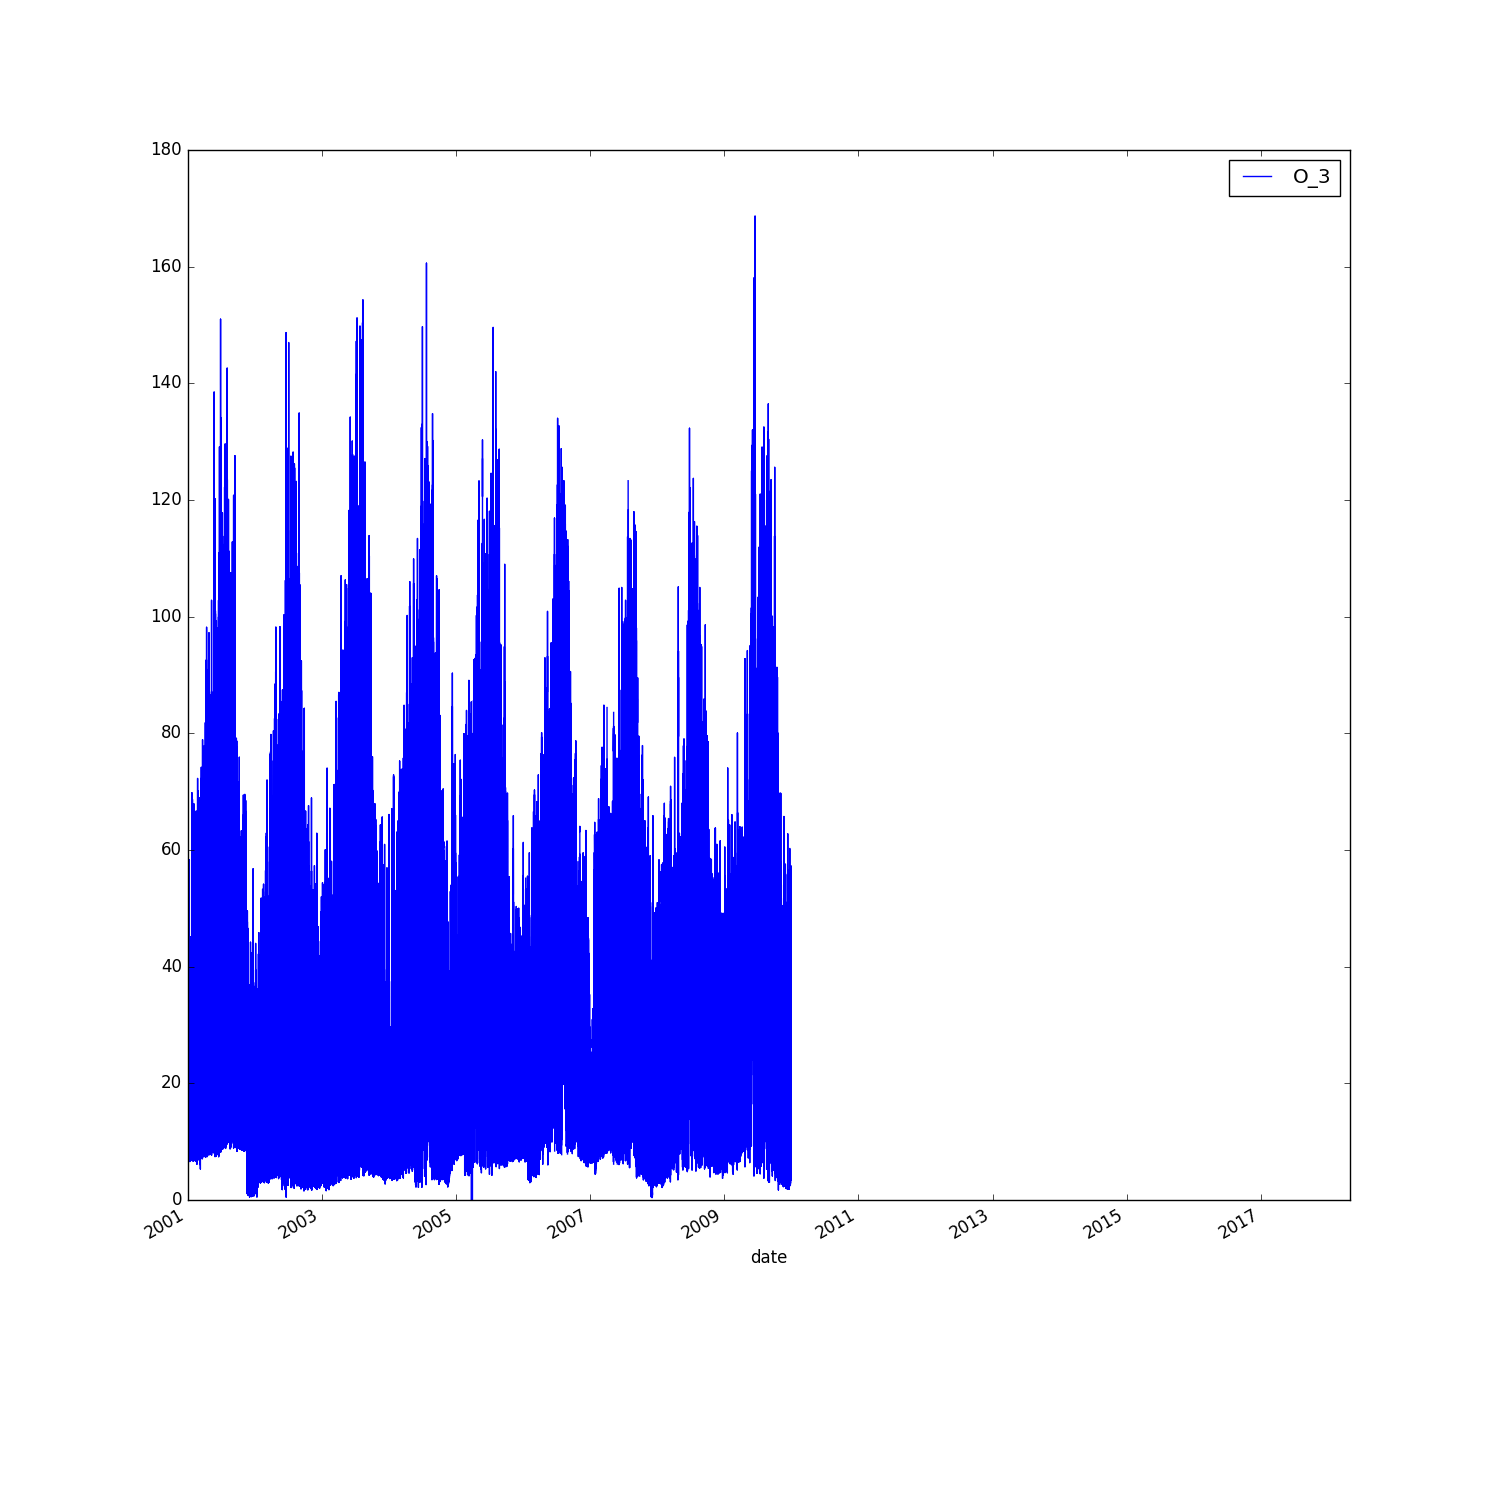

In [40]:
plt.clf()
ax = plt.gca()
fullDF.plot(x='date', y='O_3', ax=ax)
display()

In [41]:
fullData2 = sqlContext.sql("SELECT date, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL, station FROM airP")
fullData2.show()

+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
 date| BEN| CO| EBE| NMHC| NO_2| O_3| PM10| SO_2| TCH| TOL| station|
+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
2004-09-27 00:00:00| null| 1.309999942779541| null| null|115.69999694824219| 4.170000076293945| 67.26000213623047|17.270000457763672| null| null|28079012|
2004-09-27 00:00:00| null|1.8799999952316284| null| null| 118.5999984741211| 6.570000171661377| 81.44000244140625| 18.09000015258789| null| null|28079040|
2004-09-27 00:00:00| null| 2.359999895095825| null| null| 109.0999984741211| 1.25| 128.8000030517578|23.200000762939453| null| null|28079014|
2004-09-27 00:00:00| null|1.4500000476837158| null|0.44999998807907104| 132.5| 2.930000066757202| 63.43000030517578|18.110000610351562| 1.809999942779541| null|28079015|
2004-09-27 00:00:00| null| 2.690000057220459| null| null| 127.5|11.489999771118164| 90.72000122070312|22.200000762939453| null| null|28079016|
2004-09-27 00:00:00| null| 2.109999895095825| null| null| 133.0| 7.010000228881836| 138.0|15.109999656677246| null| null|28079017|
2004-09-27 00:00:00| null| 2.25| null| 0.949999988079071| 96.08000183105469|2.4000000953674316| null|11.720000267028809| 2.25| null|28079018|
2004-09-27 00:00:00| null|1.2000000476837158| null| null|133.60000610351562| 5.28000020980835| 67.62999725341797|18.940000534057617| null| null|28079019|
2004-09-27 00:00:00| null| 2.140000104904175| null| null| 93.61000061035156| 4.840000152587891| 85.31999969482422|15.859999656677246| null| null|28079036|
2004-09-27 00:00:00| null|0.7300000190734863| null| null| 95.29000091552734| 4.570000171661377| 38.04999923706055|12.960000038146973| null| null|28079021|
2004-09-27 00:00:00| 8.210000038146973|1.2300000190734863| null| null| 102.9000015258789| 2.880000114440918| 93.8499984741211|18.649999618530273| null|32.310001373291016|28079022|
2004-09-27 00:00:00| 24.0|2.5199999809265137|45.939998626708984| 0.8700000047683716| 132.1999969482422|3.3299999237060547| 80.91000366210938| 16.90999984741211| 2.259999990463257| 62.34000015258789|28079023|
2004-09-27 00:00:00| null|0.6600000262260437| null|0.18000000715255737| 111.0| 4.670000076293945| 65.2699966430664| 9.5600004196167|1.4500000476837158| null|28079024|
2004-09-27 00:00:00| 5.889999866485596| 1.590000033378601| 6.559999942779541| null|129.60000610351562| 7.25|50.630001068115234|17.510000228881836| null|27.440000534057617|28079025|
2004-09-27 00:00:00| null| null| null| 0.6700000166893005| 145.5| 8.25| 60.7599983215332|14.619999885559082|1.9600000381469727| null|28079026|
2004-09-27 00:00:00| null| null| null| 0.3700000047683716| 139.6999969482422| null| 152.0| 8.239999771118164|1.5700000524520874| null|28079027|
2004-09-27 00:00:00| 9.289999961853027| 1.75|14.260000228881836| 0.5799999833106995| 118.5| 5.599999904632568| 82.08999633789062|17.479999542236328|1.8799999952316284|31.829999923706055|28079099|
2004-09-28 00:00:00| null|1.4500000476837158| null| null| 96.58000183105469| 6.480000019073486|52.380001068115234| 17.56999969482422| null| null|28079001|
2004-09-28 00:00:00|3.5399999618530273| 1.100000023841858| 5.519999980926514| 0.4300000071525574| 89.38999938964844|3.1500000953674316| 44.16999816894531| 8.09000015258789| 1.590000033378601|22.139999389648438|28079035|
2004-09-28 00:00:00| null| null| null| null| null| null| null| null| null| null|28079003|
+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
only showing top 20 rows

In [42]:
# dauert sehr, sehr lange! 15 Minuten
plt.clf()
ax = plt.gca()
fullDF2 = air_df2.toPandas()

In [43]:
fullDF2.plot(x='date', y='PM10')
display()

In [44]:
# dauert sehr lange
air_df_pd = air_df.toPandas()
air_df_pd["red_datetime"] = [air_df_pd["date"][i].replace(hour = 0, minute = 0) for i in range(len(air_df_pd))]
air_df_pd.head(2)

In [45]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
air_df_enhanced = sqlCtx.createDataFrame(air_df_pd)

In [46]:
air_df_enhanced.registerTempTable("airT_enh")
time_gas_con = sqlContext.sql("SELECT red_datetime, station, AVG(BEN) AS BEN, AVG(CO) AS CO, AVG(EBE) AS EBE, AVG(NMHC) AS NMHC, AVG(NO_2) AS NO_2, AVG(O_3) AS O_3, AVG(PM10) AS PM10, AVG(SO_2) AS SO_2, AVG(TCH) AS TCH, AVG(TOL) AS TOL FROM airT_enh GROUP BY red_datetime, station")

In [47]:
time_gas_con.take(10)

In [48]:
# Darstellung der Anzahl Messreihen:
print(time_gas_con.count())

In [49]:
# Ausgabe der neuen Tabelle in Parquet-File:
time_gas_con.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018_time_gas_concentration.parquet")

In [50]:
air_df_grouped = air_df_new.groupBy('date').agg({'CO': 'mean', 'EBE': 'mean', 'NMHC': 'mean', 'TCH': 'mean', 'SO_2': 'mean', 'O_3': 'mean',
                                                'TOL': 'mean', 'BEN': 'mean', 'PM10': 'mean', 'NO_2': 'mean'})

In [51]:
air_df_grouped.take(3)

Out[ 28 ]: 
[Row(date=datetime.datetime(2001, 8, 15, 0, 0), avg(NO_2)=47.45773553718691, avg(NMHC)=0.16761363669524365, avg(BEN)=1.6765714230281965, avg(CO)=0.4479347833439006, avg(TCH)=1.4323484834396478, avg(O_3)=44.45786232123341, avg(EBE)=2.695916660875082, avg(TOL)=14.774855033643004, avg(SO_2)=8.069112306703692, avg(PM10)=39.42563407144685),
 Row(date=datetime.datetime(2001, 8, 16, 0, 0), avg(NO_2)=42.48502666446286, avg(NMHC)=0.13253787871817072, avg(BEN)=1.303612905740738, avg(CO)=0.4393605682237957, avg(TCH)=1.3308712054382672, avg(O_3)=46.6926156755444, avg(EBE)=1.6902290054860005, avg(TOL)=9.278355259252223, avg(SO_2)=7.3341030228624975, avg(PM10)=24.78427538405294),
 Row(date=datetime.datetime(2001, 9, 4, 0, 0), avg(NO_2)=72.68015808296539, avg(NMHC)=0.21118773921068143, avg(BEN)=2.470595236601574, avg(CO)=0.6744639710154915, avg(TCH)=1.4133333355987665, avg(O_3)=40.08383127423707, avg(EBE)=2.5884027832912073, avg(TOL)=16.519638518253004, avg(SO_2)=10.85391915661589, avg(PM10)=49.89976059929442)]

In [52]:
air_df_grouped.cache()

Out[ 29 ]: DataFrame[date: timestamp, avg(NO_2): double, avg(NMHC): double, avg(BEN): double, avg(CO): double, avg(TCH): double, avg(O_3): double, avg(EBE): double, avg(TOL): double, avg(SO_2): double, avg(PM10): double]

In [53]:
air_df_grouped.registerTempTable("airGroupedT")
res1 = sqlContext.sql("SELECT count(*) FROM airGroupedT")
res1.show()
# Shows nicely lacy evaluation. When run for the first time it takes around 2 minutes
# after running and caching, takes around 3 seconds

+--------+
count(1)|
+--------+
 6330|
+--------+

In [54]:
# zu Pandas
pd_air_df_grouped = air_df_grouped.toPandas()

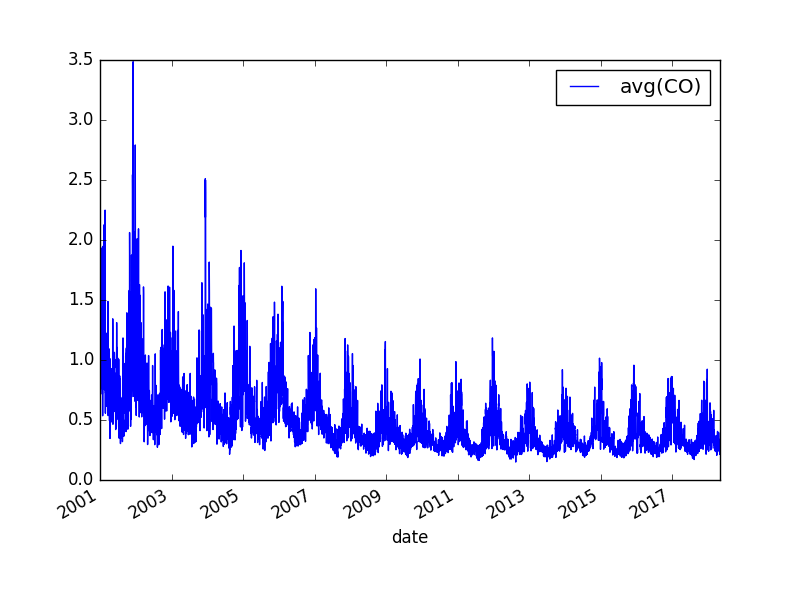

In [55]:
# CO-Plot:
pd_air_df_grouped.plot(x='date', y='avg(CO)')
display()

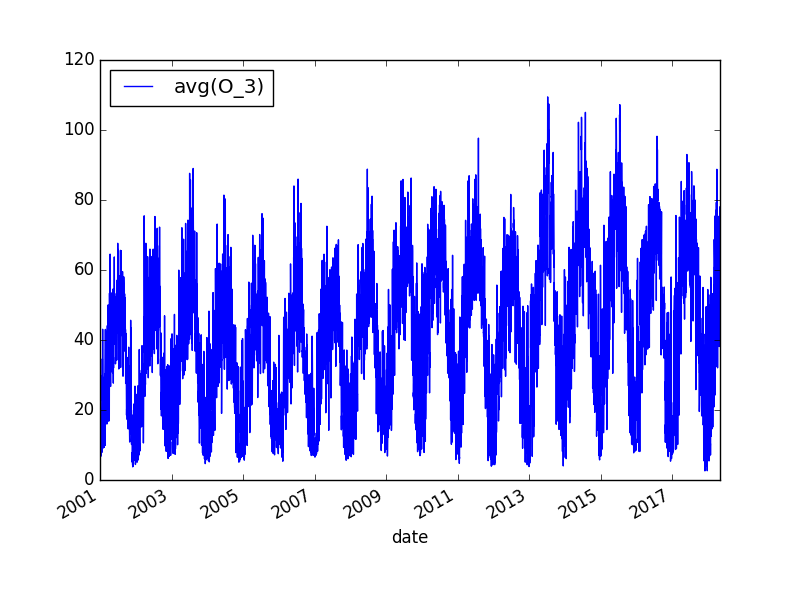

In [56]:
# O_3 Plot
pd_air_df_grouped.plot(x='date', y='avg(O_3)')
display()

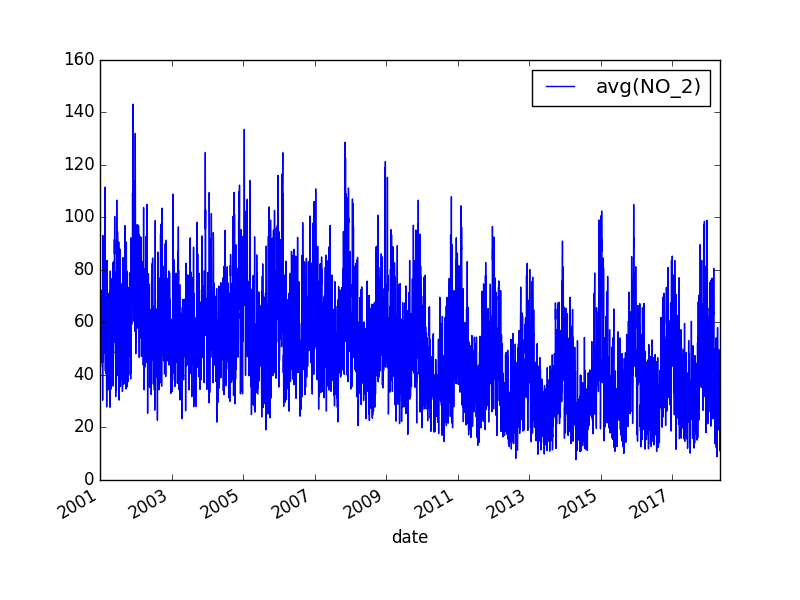

In [57]:
# NO_2 Plot:
pd_air_df_grouped.plot(x='date', y='avg(NO_2)')
display()

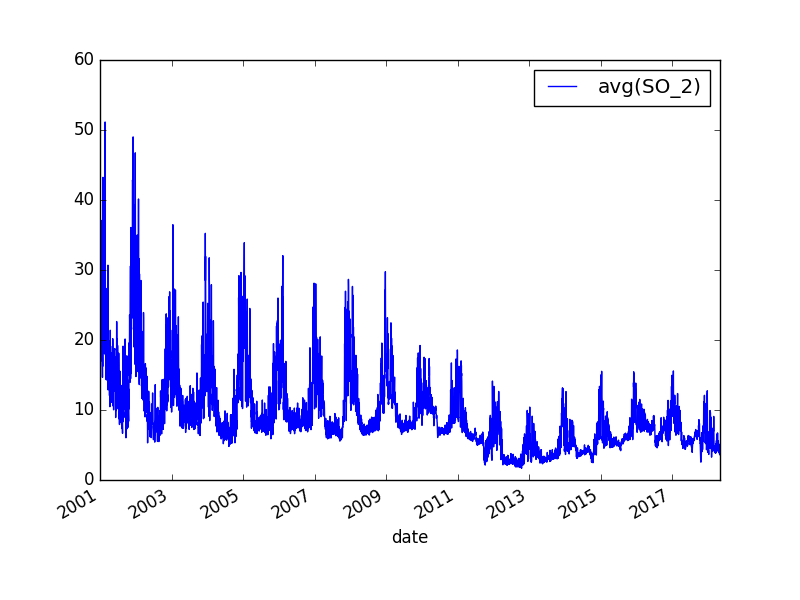

In [58]:
# SO_2 Plot
pd_air_df_grouped.plot(x='date', y='avg(SO_2)')
display()

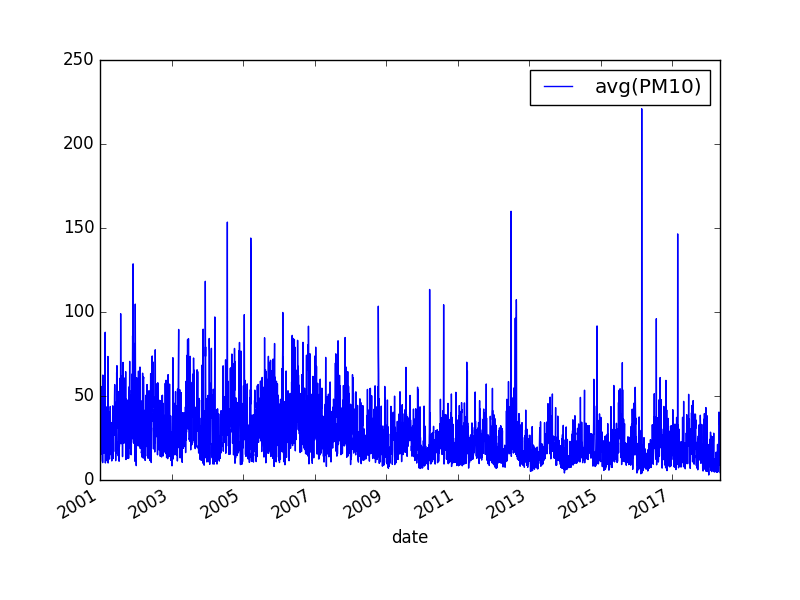

In [59]:
# PM10 Plot
pd_air_df_grouped.plot(x='date', y='avg(PM10)')
display()

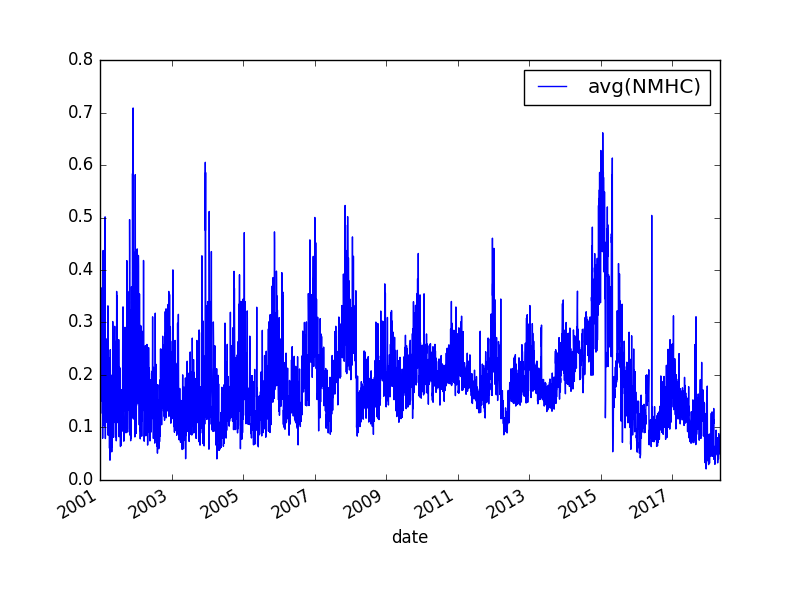

In [60]:
# NMHC Plot
pd_air_df_grouped.plot(x='date', y='avg(NMHC)')
display()

In [61]:
# Join Air mit Wetterdaten
air_weather_joined = sqlContext.sql("SELECT * FROM weatherT, airGroupedT WHERE weatherT.CET = airGroupedT.date")
# alternativ
# air_weather_joined = air_df_grouped.join(weather, air_df_grouped.date == weather.CET, 'inner')
air_weather_joined.take(3)

Out[ 31 ]: 
[Row(CET=datetime.datetime(2001, 8, 15, 0, 0), Max TemperatureC=30, Mean TemperatureC=24, Min TemperatureC=19, Dew PointC=17, MeanDew PointC=11, Min DewpointC=4, Max Humidity=83, Mean Humidity=44, Min Humidity=19, Max Sea Level PressurehPa=1019, Mean Sea Level PressurehPa=1017, Min Sea Level PressurehPa=1015, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=21, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=5, Events='Rain', WindDirDegrees=263, date=datetime.datetime(2001, 8, 15, 0, 0), avg(NO_2)=47.45773553718691, avg(NMHC)=0.16761363669524365, avg(BEN)=1.6765714230281965, avg(CO)=0.4479347833439006, avg(TCH)=1.4323484834396478, avg(O_3)=44.45786232123341, avg(EBE)=2.695916660875082, avg(TOL)=14.774855033643004, avg(SO_2)=8.069112306703692, avg(PM10)=39.42563407144685),
 Row(CET=datetime.datetime(2001, 8, 16, 0, 0), Max TemperatureC=29, Mean TemperatureC=23, Min TemperatureC=18, Dew PointC=11, MeanDew PointC=6, Min DewpointC=-2, Max Humidity=56, Mean Humidity=32, Min Humidity=13, Max Sea Level PressurehPa=1020, Mean Sea Level PressurehPa=1018, Min Sea Level PressurehPa=1016, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=24, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=3, Events=None, WindDirDegrees=260, date=datetime.datetime(2001, 8, 16, 0, 0), avg(NO_2)=42.48502666446286, avg(NMHC)=0.13253787871817072, avg(BEN)=1.303612905740738, avg(CO)=0.4393605682237957, avg(TCH)=1.3308712054382672, avg(O_3)=46.6926156755444, avg(EBE)=1.6902290054860005, avg(TOL)=9.278355259252223, avg(SO_2)=7.3341030228624975, avg(PM10)=24.78427538405294),
 Row(CET=datetime.datetime(2001, 9, 4, 0, 0), Max TemperatureC=32, Mean TemperatureC=23, Min TemperatureC=15, Dew PointC=15, MeanDew PointC=12, Min DewpointC=10, Max Humidity=88, Mean Humidity=55, Min Humidity=27, Max Sea Level PressurehPa=1019, Mean Sea Level PressurehPa=1017, Min Sea Level PressurehPa=1016, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=21, Mean Wind SpeedKm/h=6, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=2, Events=None, WindDirDegrees=341, date=datetime.datetime(2001, 9, 4, 0, 0), avg(NO_2)=72.68015808296539, avg(NMHC)=0.21118773921068143, avg(BEN)=2.470595236601574, avg(CO)=0.6744639710154915, avg(TCH)=1.4133333355987665, avg(O_3)=40.08383127423707, avg(EBE)=2.5884027832912073, avg(TOL)=16.519638518253004, avg(SO_2)=10.85391915661589, avg(PM10)=49.89976059929442)]

In [62]:
air_weather_joined.cache()

Out[ 34 ]: DataFrame[CET: timestamp, Max TemperatureC: int, Mean TemperatureC: int, Min TemperatureC: int, Dew PointC: int, MeanDew PointC: int, Min DewpointC: int, Max Humidity: int, Mean Humidity: int, Min Humidity: int, Max Sea Level PressurehPa: int, Mean Sea Level PressurehPa: int, Min Sea Level PressurehPa: int, Max VisibilityKm: int, Mean VisibilityKm: int, Min VisibilitykM: int, Max Wind SpeedKm/h: int, Mean Wind SpeedKm/h: int, Max Gust SpeedKm/h: int, Precipitationmm: double, CloudCover: int, Events: string, WindDirDegrees: int, date: timestamp, avg(NO_2): double, avg(NMHC): double, avg(BEN): double, avg(CO): double, avg(TCH): double, avg(O_3): double, avg(EBE): double, avg(TOL): double, avg(SO_2): double, avg(PM10): double]

In [63]:
air_weather_joined.count()

Out[ 37 ]: 5448

In [64]:
air_weather_joined.take(3)

Out[ 38 ]: 
[Row(CET=datetime.datetime(2001, 8, 15, 0, 0), Max TemperatureC=30, Mean TemperatureC=24, Min TemperatureC=19, Dew PointC=17, MeanDew PointC=11, Min DewpointC=4, Max Humidity=83, Mean Humidity=44, Min Humidity=19, Max Sea Level PressurehPa=1019, Mean Sea Level PressurehPa=1017, Min Sea Level PressurehPa=1015, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=21, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=5, Events='Rain', WindDirDegrees=263, date=datetime.datetime(2001, 8, 15, 0, 0), avg(NO_2)=47.45773553718691, avg(NMHC)=0.16761363669524365, avg(BEN)=1.6765714230281965, avg(CO)=0.4479347833439006, avg(TCH)=1.4323484834396478, avg(O_3)=44.45786232123341, avg(EBE)=2.695916660875082, avg(TOL)=14.774855033643004, avg(SO_2)=8.069112306703692, avg(PM10)=39.42563407144685),
 Row(CET=datetime.datetime(2001, 8, 16, 0, 0), Max TemperatureC=29, Mean TemperatureC=23, Min TemperatureC=18, Dew PointC=11, MeanDew PointC=6, Min DewpointC=-2, Max Humidity=56, Mean Humidity=32, Min Humidity=13, Max Sea Level PressurehPa=1020, Mean Sea Level PressurehPa=1018, Min Sea Level PressurehPa=1016, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=24, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=3, Events=None, WindDirDegrees=260, date=datetime.datetime(2001, 8, 16, 0, 0), avg(NO_2)=42.48502666446286, avg(NMHC)=0.13253787871817072, avg(BEN)=1.303612905740738, avg(CO)=0.4393605682237957, avg(TCH)=1.3308712054382672, avg(O_3)=46.6926156755444, avg(EBE)=1.6902290054860005, avg(TOL)=9.278355259252223, avg(SO_2)=7.3341030228624975, avg(PM10)=24.78427538405294),
 Row(CET=datetime.datetime(2001, 9, 4, 0, 0), Max TemperatureC=32, Mean TemperatureC=23, Min TemperatureC=15, Dew PointC=15, MeanDew PointC=12, Min DewpointC=10, Max Humidity=88, Mean Humidity=55, Min Humidity=27, Max Sea Level PressurehPa=1019, Mean Sea Level PressurehPa=1017, Min Sea Level PressurehPa=1016, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=21, Mean Wind SpeedKm/h=6, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=2, Events=None, WindDirDegrees=341, date=datetime.datetime(2001, 9, 4, 0, 0), avg(NO_2)=72.68015808296539, avg(NMHC)=0.21118773921068143, avg(BEN)=2.470595236601574, avg(CO)=0.6744639710154915, avg(TCH)=1.4133333355987665, avg(O_3)=40.08383127423707, avg(EBE)=2.5884027832912073, avg(TOL)=16.519638518253004, avg(SO_2)=10.85391915661589, avg(PM10)=49.89976059929442)]

In [65]:
pd_air_df_grouped = air_df_grouped.toPandas()

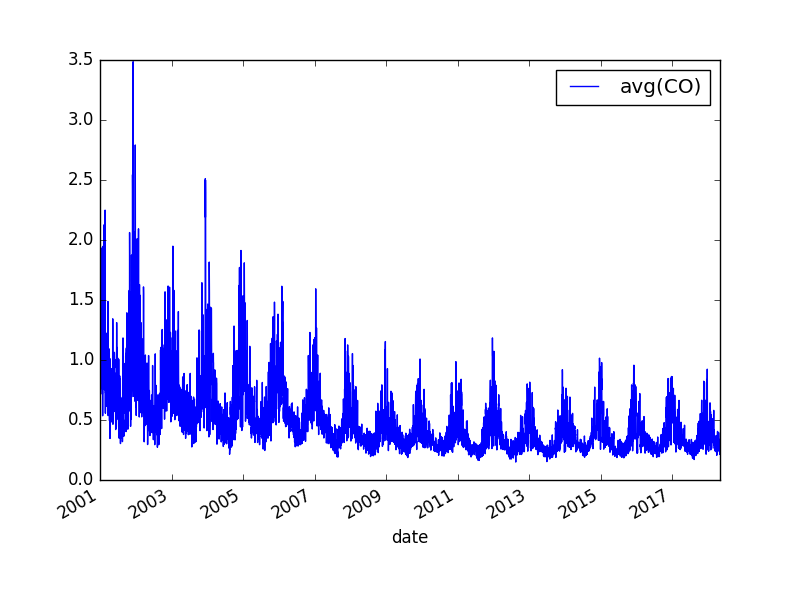

In [66]:
pd_air_df_grouped.plot(x='date', y='avg(CO)')
display()

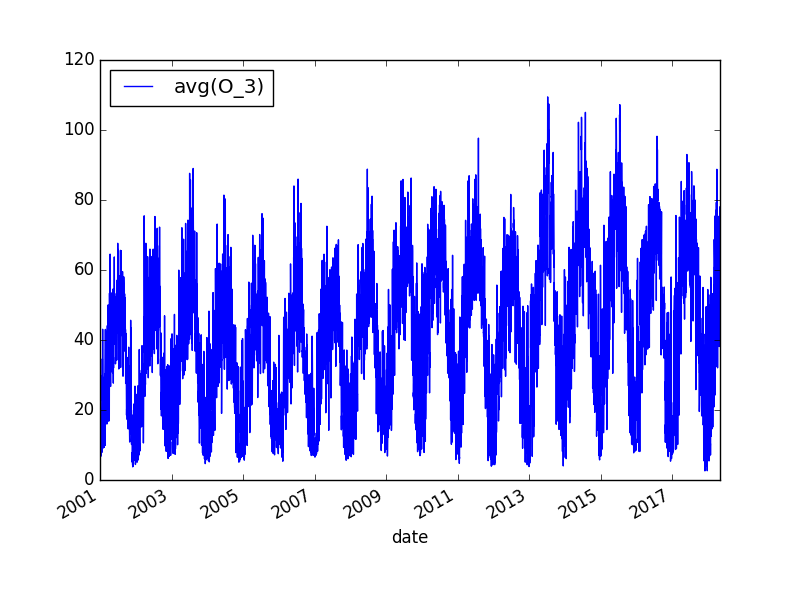

In [67]:
pd_air_df_grouped.plot(x='date', y='avg(O_3)')
display()

In [68]:
air_weather_joined.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)
-- date: timestamp (nullable = true)
-- avg(NO_2): double (nullable = true)
-- avg(NMHC): double (nullable = true)
-- avg(BEN): double (nullable = true)
-- avg(CO): double (nullable = true)
-- avg(TCH): double (nullable = true)
-- avg(O_3): double (nullable = true)
-- avg(EBE): double (nullable = true)
-- avg(TOL): double (nullable = true)
-- avg(SO_2): double (nullable = true)
-- avg(PM10): double (nullable = true)

In [69]:
import numpy as np
date = air_weather_joined.select("CET")
date_pd = date.toPandas()
temp_air_pollution = air_weather_joined.select("Mean TemperatureC", "avg(NO_2)", "avg(PM10)")
temp_air_pollution_pd = temp_air_pollution.toPandas()

is_a_number = ~np.isnan(temp_air_pollution_pd['Mean TemperatureC']) # 2 entries of temperature are NaN and need to be thrown out. This gives indices of good values

# subsetting both date_pd and temp_air_pollution_pd:
date_pd = date_pd[is_a_number]
temp_air_pollution_pd = temp_air_pollution_pd[is_a_number]

In [70]:
# normalized_df=(df-df.mean())/df.std()
normalized_temp_air_pollution_pd = (temp_air_pollution_pd - temp_air_pollution_pd.mean())/temp_air_pollution_pd.std()
normalized_temp_air_pollution_pd

Out[ 44 ]: 
 Mean TemperatureC avg(NO_2) avg(PM10)
0 1.220117 -0.203096 0.734460
1 1.089502 -0.448908 -0.203628
2 1.089502 1.043705 1.405549
3 -0.608487 -0.029812 -0.108352
4 -0.739102 -0.764032 -0.878124
5 1.089502 -0.322316 0.468297
6 -1.653404 0.594649 -0.195619
7 -1.000331 0.424826 -0.642647
8 -1.130946 -0.399283 -0.864410
9 -1.130946 1.796303 1.463014
10 -0.347258 0.413977 -0.425901
11 -0.086029 1.076184 0.158274
12 -1.522790 1.090401 0.140282
13 0.436429 -0.061449 0.109436
14 0.436429 1.449519 1.253130
15 -0.869717 1.000548 -0.256688
16 -0.216644 -0.381581 -0.540446
17 -0.739102 -0.842531 -1.043556
18 -1.522790 1.812954 1.009137
19 -0.869717 0.243199 -0.429281
20 0.436429 0.338404 0.391295
21 0.958888 -0.226852 -0.118621
22 -0.347258 -0.195764 -0.118235
23 -0.739102 0.693551 -0.100143
24 0.305815 -0.103952 -0.913479
25 0.828273 -0.614290 -0.251677
26 -0.608487 -0.889370 -0.942911
27 1.611961 -0.179862 -0.280666
28 -0.216644 -0.347107 -0.776123
29 -0.347258 1.894633 0.772888
... ... ... ...
5418 -0.216644 -1.468308 -1.145088
5419 -1.392175 1.174798 0.182041
5420 -0.739102 -0.181006 -0.656962
5421 -1.392175 0.973574 0.906647
5422 -1.392175 0.711654 -0.381374
5423 1.220117 -0.151201 -0.340796
5424 -1.392175 0.373761 -0.834868
5425 0.175200 0.462277 -0.533488
5426 1.220117 1.855747 2.336595
5427 1.611961 0.100566 1.321574
5428 -1.653404 1.046699 0.550247
5429 -0.869717 0.457103 -0.389767
5430 1.220117 -0.308712 0.306149
5431 -1.130946 0.927904 0.401429
5432 0.436429 -0.419363 -0.891054
5433 0.175200 -0.511528 -0.764431
5434 -0.216644 -0.438322 -0.727095
5435 -0.347258 1.032947 0.288274
5436 -0.869717 0.063416 -0.372790
5437 1.220117 -0.990545 -0.538040
5438 -0.869717 -1.645521 -1.219338
5439 -0.869717 0.332449 -0.422064
5440 1.742575 -1.023838 0.483869
5441 1.611961 -1.442208 0.136674
5442 0.828273 -1.143652 -0.424584
5443 -0.869717 -0.524208 -1.378681
5444 -0.869717 -1.483479 -1.168570
5445 0.436429 1.349395 0.879158
5446 -1.130946 1.219744 -0.393220
5447 -0.347258 -1.373035 -0.693862

[5446 rows x 3 columns]

In [71]:
date_temp_air_scaled_pd = pd.concat([date_pd, normalized_temp_air_pollution_pd], axis=1)
date_temp_air_scaled_pd["Mean TemperatureC"] = date_temp_air_scaled_pd["Mean TemperatureC"] - 5
date_temp_air_scaled_pd["avg(PM10)"] = date_temp_air_scaled_pd["avg(PM10)"] + 5
date_temp_air_scaled_pd.columns = ['Date', "mean Temperature (norm)", "mean NO_2 (norm)", "mean PM_10 (norm)"]
date_temp_air_scaled_pd

Out[ 45 ]: 
 Date mean Temperature (norm) mean NO_2 (norm) mean PM_10 (norm)
0 2001-08-15 -3.779883 -0.203096 5.734460
1 2001-08-16 -3.910498 -0.448908 4.796372
2 2001-09-04 -3.910498 1.043705 6.405549
3 2001-04-22 -5.608487 -0.029812 4.891648
4 2003-01-01 -5.739102 -0.764032 4.121876
5 2002-08-04 -3.910498 -0.322316 5.468297
6 2003-02-01 -6.653404 0.594649 4.804381
7 2003-02-26 -6.000331 0.424826 4.357353
8 2004-03-25 -6.130946 -0.399283 4.135590
9 2005-11-16 -6.130946 1.796303 6.463014
10 2005-04-13 -5.347258 0.413977 4.574099
11 2005-04-26 -5.086029 1.076184 5.158274
12 2005-12-15 -6.522790 1.090401 5.140282
13 2006-05-06 -4.563571 -0.061449 5.109436
14 2006-05-25 -4.563571 1.449519 6.253130
15 2006-11-26 -5.869717 1.000548 4.743312
16 2006-03-12 -5.216644 -0.381581 4.459554
17 2006-12-06 -5.739102 -0.842531 3.956444
18 2006-12-21 -6.522790 1.812954 6.009137
19 2007-12-26 -5.869717 0.243199 4.570719
20 2007-10-01 -4.563571 0.338404 5.391295
21 2007-07-24 -4.041112 -0.226852 4.881379
22 2007-03-17 -5.347258 -0.195764 4.881765
23 2008-03-08 -5.739102 0.693551 4.899857
24 2009-10-15 -4.694185 -0.103952 4.086521
25 2009-06-10 -4.171727 -0.614290 4.748323
26 2010-03-25 -5.608487 -0.889370 4.057089
27 2010-08-21 -3.388039 -0.179862 4.719334
28 2010-04-19 -5.216644 -0.347107 4.223877
29 2010-10-22 -5.347258 1.894633 5.772888
... ... ... ... ...
5418 2015-03-01 -5.216644 -1.468308 3.854912
5419 2002-01-08 -6.392175 1.174798 5.182041
5420 2004-03-22 -5.739102 -0.181006 4.343038
5421 2004-02-18 -6.392175 0.973574 5.906647
5422 2004-02-23 -6.392175 0.711654 4.618626
5423 2004-06-24 -3.779883 -0.151201 4.659204
5424 2004-12-22 -6.392175 0.373761 4.165132
5425 2004-05-25 -4.824800 0.462277 4.466512
5426 2005-08-25 -3.779883 1.855747 7.336595
5427 2005-08-29 -3.388039 0.100566 6.321574
5428 2006-01-24 -6.653404 1.046699 5.550247
5429 2006-11-17 -5.869717 0.457103 4.610233
5430 2006-07-03 -3.779883 -0.308712 5.306149
5431 2007-01-30 -6.130946 0.927904 5.401429
5432 2008-06-06 -4.563571 -0.419363 4.108946
5433 2008-05-16 -4.824800 -0.511528 4.235569
5434 2008-05-18 -5.216644 -0.438322 4.272905
5435 2009-03-12 -5.347258 1.032947 5.288274
5436 2010-11-11 -5.869717 0.063416 4.627210
5437 2011-08-24 -3.779883 -0.990545 4.461960
5438 2012-04-15 -5.869717 -1.645521 3.780662
5439 2012-01-06 -5.869717 0.332449 4.577936
5440 2013-07-11 -3.257425 -1.023838 5.483869
5441 2013-07-15 -3.388039 -1.442208 5.136674
5442 2013-09-07 -4.171727 -1.143652 4.575416
5443 2013-12-19 -5.869717 -0.524208 3.621319
5444 2013-03-12 -5.869717 -1.483479 3.831430
5445 2014-10-30 -4.563571 1.349395 5.879158
5446 2014-12-23 -6.130946 1.219744 4.606780
5447 2015-04-07 -5.347258 -1.373035 4.306138

[5446 rows x 4 columns]

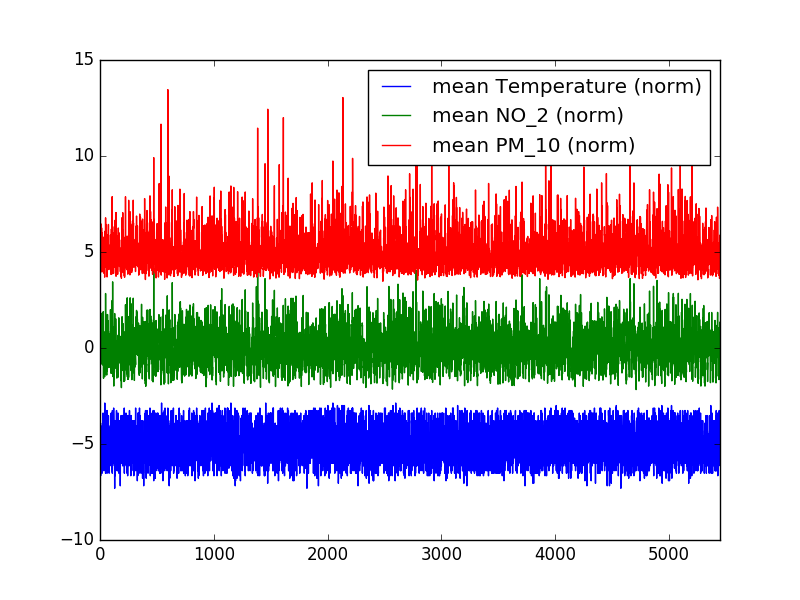

In [72]:
date_temp_air_scaled_pd.plot()
display()

In [73]:
date_temp_air_scaled_pd.corr() # Korrelationsmatrix

Out[ 47 ]: 
 mean Temperature (norm) mean NO_2 (norm) \
mean Temperature (norm) 1.000000 -0.256980 
mean NO_2 (norm) -0.256980 1.000000 
mean PM_10 (norm) 0.234134 0.644765 

 mean PM_10 (norm) 
mean Temperature (norm) 0.234134 
mean NO_2 (norm) 0.644765 
mean PM_10 (norm) 1.000000

In [74]:
temp_air_pollution_extended = air_weather_joined.select("Mean TemperatureC", 
                                                        "avg(NO_2)", 
                                                        "avg(NMHC)", 
                                                        "avg(BEN)", 
                                                        "avg(CO)", 
                                                        "avg(TCH)", 
                                                        "avg(O_3)", 
                                                        "avg(EBE)",
                                                        "avg(TOL)",
                                                        "avg(SO_2)",
                                                        "avg(PM10)") # Vergleiche Cmd 43, aber hier: meanTemp und alle AirPoll für Korrel.-Matrix

In [75]:
temp_air_pollution_extended_pd = temp_air_pollution_extended.toPandas()
korrel_mat = temp_air_pollution_extended_pd.corr()
korrel_mat

Out[ 49 ]: 
 Mean TemperatureC avg(NO_2) avg(NMHC) avg(BEN) \
Mean TemperatureC 1.000000 -0.256980 -0.250519 -0.278386 
avg(NO_2) -0.256980 1.000000 0.418217 0.655108 
avg(NMHC) -0.250519 0.418217 1.000000 0.313555 
avg(BEN) -0.278386 0.655108 0.313555 1.000000 
avg(CO) -0.416507 0.766166 0.417304 0.917011 
avg(TCH) -0.346985 0.637322 0.726914 0.551481 
avg(O_3) 0.631647 -0.662071 -0.350165 -0.538264 
avg(EBE) -0.171244 0.674927 0.260994 0.921717 
avg(TOL) -0.158796 0.712914 0.343901 0.944766 
avg(SO_2) -0.483894 0.704613 0.332185 0.796474 
avg(PM10) 0.234134 0.644726 0.280151 0.517719 

 avg(CO) avg(TCH) avg(O_3) avg(EBE) avg(TOL) \
Mean TemperatureC -0.416507 -0.346985 0.631647 -0.171244 -0.158796 
avg(NO_2) 0.766166 0.637322 -0.662071 0.674927 0.712914 
avg(NMHC) 0.417304 0.726914 -0.350165 0.260994 0.343901 
avg(BEN) 0.917011 0.551481 -0.538264 0.921717 0.944766 
avg(CO) 1.000000 0.640929 -0.659441 0.850078 0.896986 
avg(TCH) 0.640929 1.000000 -0.565845 0.503979 0.567455 
avg(O_3) -0.659441 -0.565845 1.000000 -0.498342 -0.520886 
avg(EBE) 0.850078 0.503979 -0.498342 1.000000 0.936639 
avg(TOL) 0.896986 0.567455 -0.520886 0.936639 1.000000 
avg(SO_2) 0.874268 0.541762 -0.594947 0.731787 0.745410 
avg(PM10) 0.539619 0.422439 -0.233750 0.582181 0.619579 

 avg(SO_2) avg(PM10) 
Mean TemperatureC -0.483894 0.234134 
avg(NO_2) 0.704613 0.644726 
avg(NMHC) 0.332185 0.280151 
avg(BEN) 0.796474 0.517719 
avg(CO) 0.874268 0.539619 
avg(TCH) 0.541762 0.422439 
avg(O_3) -0.594947 -0.233750 
avg(EBE) 0.731787 0.582181 
avg(TOL) 0.745410 0.619579 
avg(SO_2) 1.000000 0.443698 
avg(PM10) 0.443698 1.000000

In [76]:
def plot_corr(df,size=10): # Funktion zum Berechnen und Plotten von Korrelationsmatrix (Input ist Pandas-Dataframe)
                           # Diese Def., weil plt.matshow(dataframe.corr()) (plt aus matplotlib) keine Beschriftung macht
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, interpolation='nearest')
    fig.colorbar(cax)
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


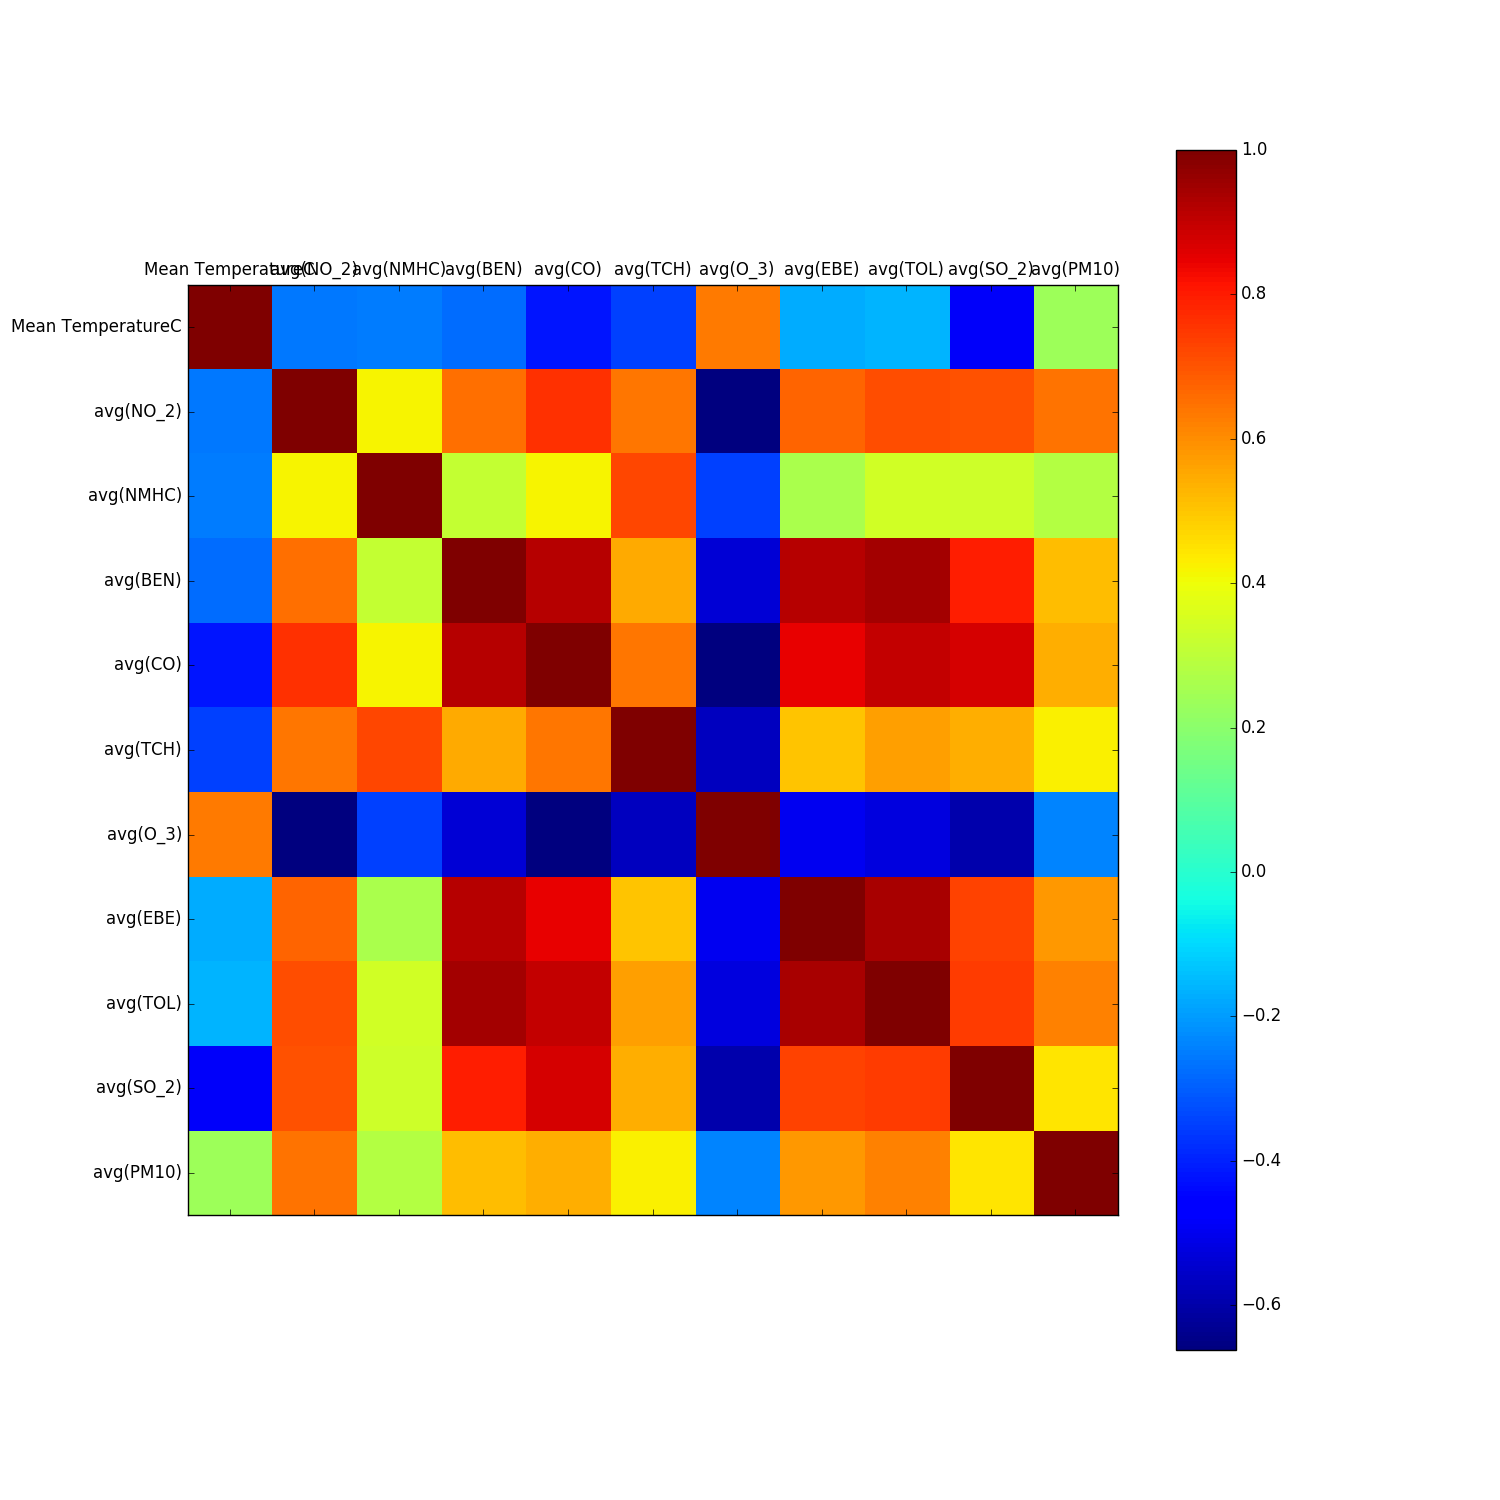

In [77]:
plot_corr(temp_air_pollution_extended_pd, size = 15)
display()